# Mahtab Nejati
# 98209434
# Problem 11

In [1]:
import numpy as np
import pandas as pd
from math import e,log,ceil
from random import shuffle
import matplotlib.pyplot as plt
import pickle

## Setting parameters

In [2]:
sigma = e**(-5)
epsilon = e*10**(-4)

hashes = ceil(log(1/sigma))
buckets = ceil(e/epsilon)

## Loading in data
### Loading the stream is commented out because it takes time and a the pickled results are available.

In [3]:
# stream = np.loadtxt('./q11/words_stream.txt', dtype=int, delimiter='\n')
# stream_length = len(stream)

In [4]:
counts = pd.read_csv('./q11/counts.txt', header=None, names=['word','count'],delimiter='\t')
counts = counts.set_index('word')

## Setting up hash functions

In [5]:
params = pd.read_csv('./q11/hash_params.txt', header=None, names=['a','b'],delimiter='\t').\
    to_dict(orient='records')[:hashes].copy()

def hash_function(params,buckets,x,p=123457):
    hash_value = (params['a']*(x % p)+params['b'])%p
    return hash_value % buckets

## Main algorithm

In [6]:
def count_min(stream,hashes,buckets,params):
    hashed = np.zeros((buckets,hashes),dtype=int)
    for x in stream:
        for ith_hash in range(hashes):
            bucket = hash_function(params[ith_hash],buckets,x)
            hashed[bucket,ith_hash] += 1
    return hashed

## Estimating and error computation
### Commented out because the pickled results are available.
### Download the pickled results from the link below:
### https://drive.google.com/drive/folders/1kuvVyOYjzzWg0et8OhhfPZLROLYZfzlv?usp=sharing

In [7]:
# hashed = count_min(stream,hashes,buckets,params)

# actuals = list(counts['count'])
# actual_freqs = []
# errors = []
# estimates = []


# for index,row in counts.iterrows():
#     x = index
#     hashed_vals = [].copy()
#     for ith_hash in range(hashes):
#         bucket = hash_function(params[ith_hash],buckets,x)
#         hashed_vals.append(hashed[bucket,ith_hash])
#     actual = counts.iloc[index-1]['count']
#     estimate = min(hashed_vals)
#     estimates.append(estimate)
#     errors.append(abs(actual-estimate)/actual)
#     actual_freqs.append(actual/stream_length)

    

# counts['actual_freqs'] = actual_freqs
# counts['estimate'] = estimates
# counts['error'] = errors

# vec_log = np.vectorize(log)
# error_log = vec_log(errors,10)
# counts['error_log'] = error_log

# with open('./q11_results_pickled','wb') as f:
#     pickle.dump(counts,f)

In [8]:
with open('./q11_results_pickled','rb') as f:
    counts = pickle.load(f)
    
actuals = list(counts['count'])
actual_freqs = list(counts['actual_freqs'])
errors = list(counts['error'])
error_log = list(counts['error_log'])

## Error to Frequency Plot
### Datapoints are color-coded to differentiate between the ones with error less than 1 and the ones with error more than one.

In [9]:
counts['error_less_than_1'] = (counts['error'] <= 1)
error_less_than_1 = list(counts['error_less_than_1'])
colors = ['green' if x else 'red' for x in error_less_than_1]

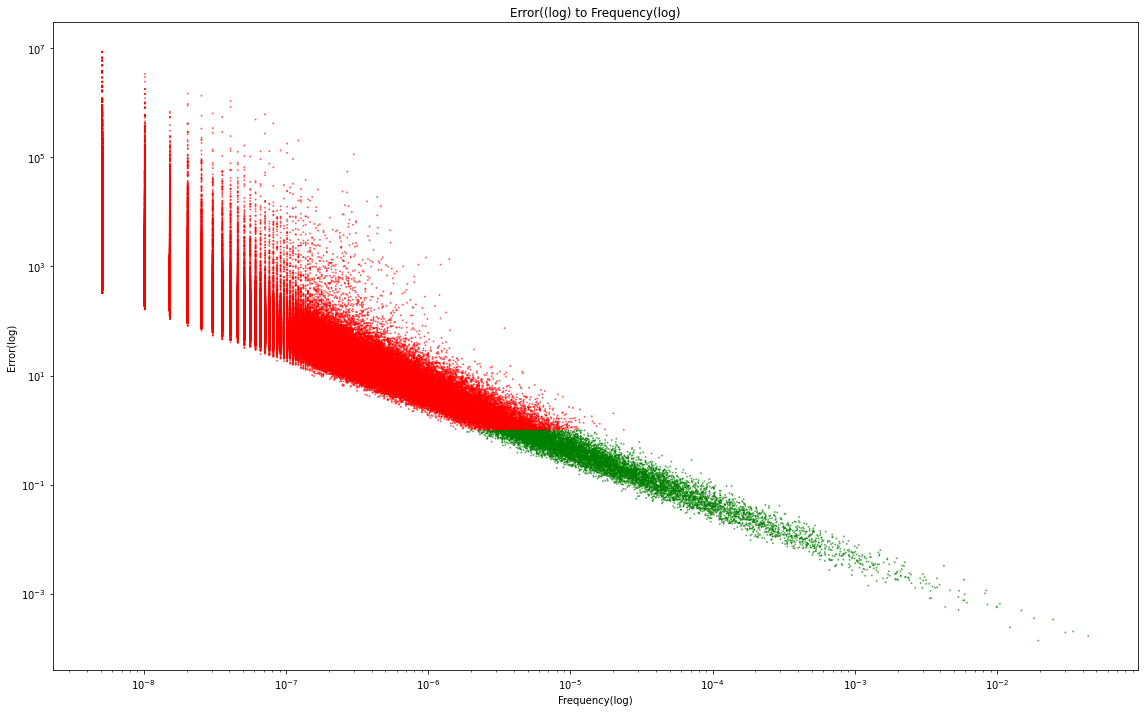

In [10]:
plt.figure(figsize=(16,10))
plt.scatter(actual_freqs,errors,c=colors,alpha=0.5,s=1)
plt.xscale('log')
plt.yscale('log')
plt.title('Error((log) to Frequency(log)')
plt.xlabel('Frequency(log)')
plt.ylabel('Error(log)')
plt.tight_layout()
plt.savefig('q11_log_log')
plt.show()

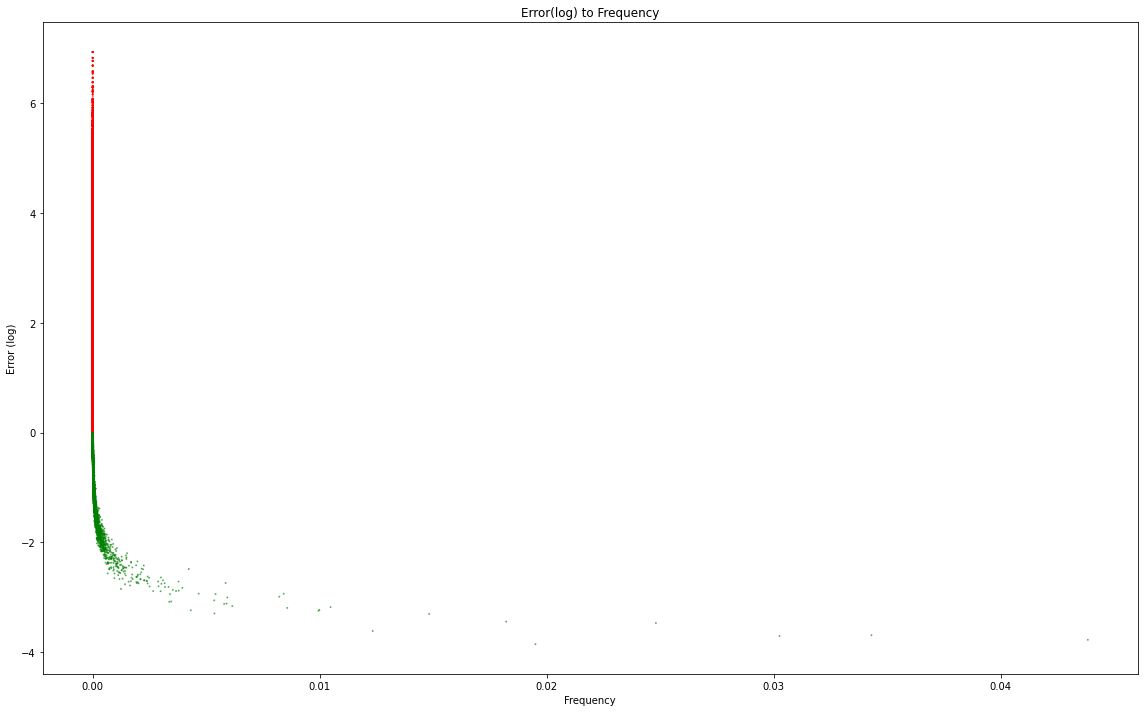

In [11]:
plt.figure(figsize=(16,10))
plt.scatter(actual_freqs,error_log,c=colors,alpha=0.5,s=1)
plt.title('Error(log) to Frequency')
plt.xlabel('Frequency')
plt.ylabel('Error (log)')
plt.tight_layout()
plt.savefig('q11_log_linear')
plt.show()

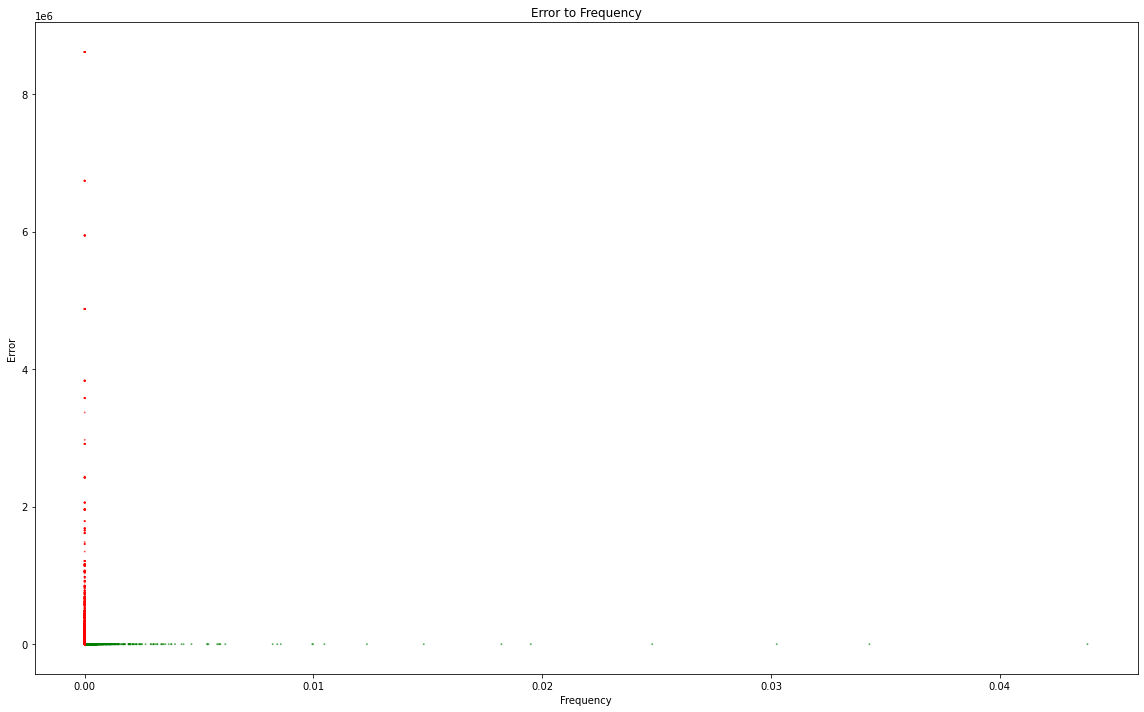

In [12]:
plt.figure(figsize=(16,10))
plt.scatter(actual_freqs,errors,c=colors,alpha=0.5,s=1)
plt.title('Error to Frequency')
plt.xlabel('Frequency')
plt.ylabel('Error')
plt.tight_layout()
plt.savefig('q11_linear_linear')
plt.show()

## Conditions for error less than 1

In [13]:
counts['all'] = 'Whole'
stats = counts.groupby('error_less_than_1').agg({'actual_freqs':['size','min','max','mean','median']})
stats_on_whole = counts.groupby('all').agg({'actual_freqs':['size','min','max','mean','median']})
counts = counts.drop(['all'],axis=1)
stats_on_whole.rename(columns={'all':'error_less_than_1'},inplace=True)
stats.append(stats_on_whole)

actual_freqs                                                    
              size           min       max          mean        median
False      1398803  5.090812e-09  0.000024  4.729868e-08  5.090812e-09
True          8790  1.873419e-06  0.043832  1.062387e-04  1.407101e-05
Whole      1407593  5.090812e-09  0.043832  7.104326e-07  5.090812e-09